In [29]:
import re


In [30]:
import nltk

In [31]:
import string

In [32]:
import numpy as np

In [33]:
import pandas as pd
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt 
import warnings
%matplotlib inline

In [35]:
pd.set_option("display.max_colwidth", 200) 


In [36]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [37]:
train  = pd.read_csv('Datasets/train_E6oV3lV.csv') 


In [38]:
test = pd.read_csv('Datasets/test_tweets_anuFYb8.csv')

In [39]:
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [40]:
train[train['label'] == 1].head(20)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [41]:
train.shape, test.shape

((21602, 3), (17197, 2))

In [42]:
train["label"].value_counts()

0    20109
1     1493
Name: label, dtype: int64

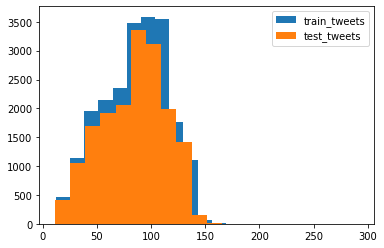

In [43]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [44]:
combi = train.append(test, ignore_index=True,sort=False) 


<ipython-input-44-d6600dcb1a07>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True,sort=False)


In [45]:
combi.shape

(38799, 3)

In [46]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [47]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [48]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [49]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [50]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [51]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

In [52]:
tokenized_tweet.head()

0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                         [bihday, your, majesty]
3                                      [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [53]:
from nltk.stem.porter import * 


In [54]:
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [55]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

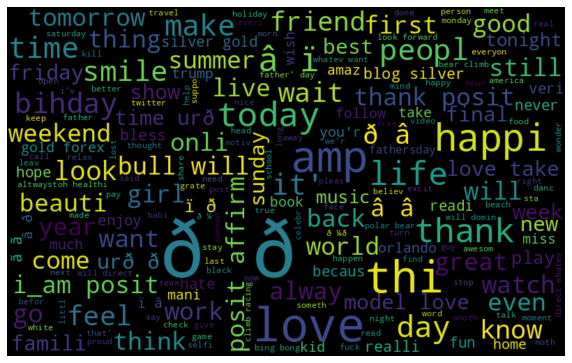

In [56]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

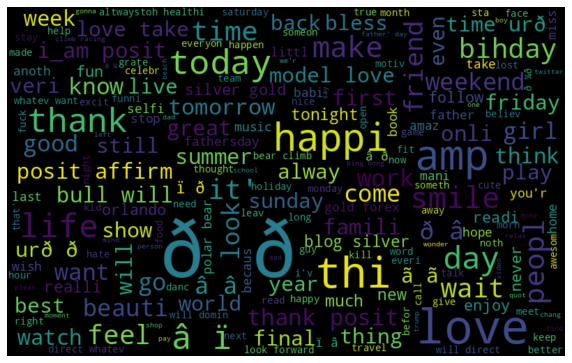

In [57]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

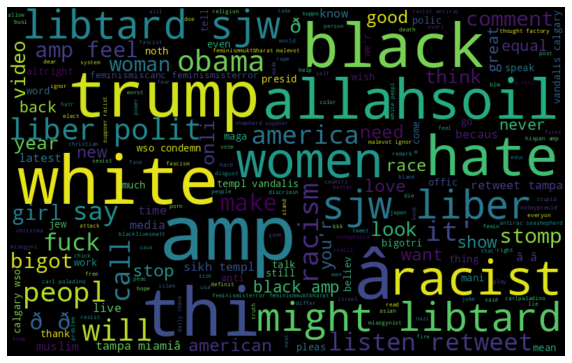

In [58]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()


In [59]:
def hashtag_extract(x): 
    hashtags = []    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)    
        hashtags.append(ht)    
    return hashtags

In [60]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

In [61]:
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 

In [62]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

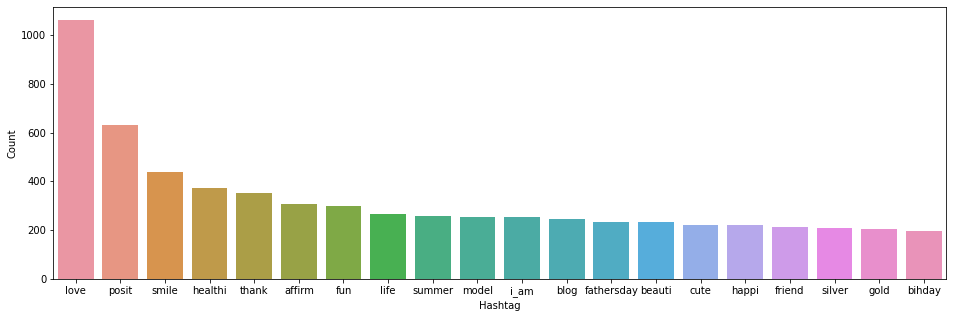

In [63]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),                  'Count': list(a.values())}) 
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

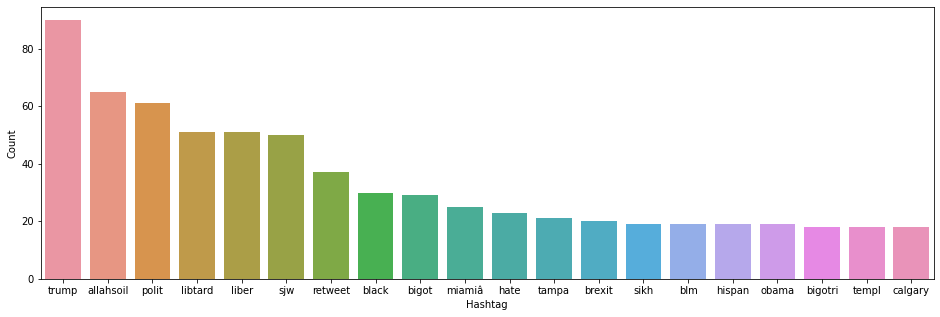

In [64]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [66]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(5210983, 6463160)

In [67]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.6738036274909973),
 ('#brunch', 0.6284948587417603),
 ('shopping!', 0.6256481409072876),
 ('sister!!', 0.604419469833374),
 ('lukey', 0.6034104824066162),
 ('yummi', 0.603217601776123),
 ('#lovefood', 0.6014449596405029),
 ('#balconyview', 0.5978779792785645),
 ('#toast', 0.5973002910614014),
 ('lamb', 0.59579998254776)]

In [68]:
model_w2v['food']


array([ 0.20588206,  0.4081304 ,  0.21788982, -0.00785668,  0.6447487 ,
        0.49641865, -0.08005146, -0.47113812, -0.14778613, -0.22786655,
       -0.02122128, -0.86408454, -0.13559663,  0.15869416, -0.1337865 ,
       -0.592042  ,  0.8254676 , -0.34000382, -0.8686175 ,  0.17309657,
       -0.46440363,  0.22193065, -0.52613336, -0.10040777, -0.13866273,
        0.7202538 , -0.076777  ,  0.30561724, -0.01094659, -0.30192712,
        0.31316277, -0.33709723, -0.63192713, -0.8083769 , -0.2968711 ,
        0.29945686, -0.05748035, -0.13669465, -0.532916  , -0.03145634,
        0.6695882 , -0.66157514,  0.2115307 , -0.7989824 , -0.19094487,
       -0.4015942 ,  0.19407059, -0.00858373,  0.29860955, -0.34025592,
        0.1311372 , -0.7798072 ,  0.47121072,  0.32529444,  0.13584562,
        0.5556641 , -0.48768443,  0.04778887, -0.25059086,  0.26395938,
       -0.64387625,  0.09604764, -0.17720407, -0.13183355,  0.7832946 ,
       -0.6390391 , -0.21891434, -0.7762062 , -0.67332715,  0.09

In [69]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
            
            # handling the case where the token is not in vocabulary                                     continue
        if count != 0:
            vec /= count
    return vec

In [70]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape 

(38799, 200)

In [71]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [72]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet)

In [73]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', "can't", 'caus', 'they', "don't", 'offer', 'wheelchair', 'van', 'pdx.', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fare', 'talk', 'befor', 'they', 'leave.', 'chao', 'disput', 'when', 'they', 'there.', '#allshowandnogo'], tags=['tweet_5'])]

In [74]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   dm_mean=1, # dm = 1 for using mean of the context word vectors                                  size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])


100%|██████████| 38799/38799 [00:00<00:00, 1856410.50it/s]


In [75]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)